In [1]:
!pip install rdkit
!pip install umap-learn
!pip install hdbscan
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install numpy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipy_display
from IPython.display import Image, display

import rdkit
import rdkit.Chem.Descriptors
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw.MolDrawing import MolDrawing
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import rdFingerprintGenerator

In [7]:
file_path = "/content/drive/MyDrive/BioSolveAI/data/curated-solubility-dataset.csv"
df = pd.read_csv(file_path)

# loading the dataset and inspecting it
print(f"Dataset has shape {df.shape} \nFirst 5 entries: ")
df.head()

Dataset has shape (9982, 26) 
First 5 entries: 


,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934


In [4]:
# missing value and duplicate check
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
  print(f"There are no missing values.")

duplicate_values = df.duplicated().sum()
if duplicate_values == 0:
  print(f"There are no duplicates.")

There are no missing values.
There are no duplicates.


,1
ID,A-4
Name,Benzo[cd]indol-2(1H)-one
InChI,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...
InChIKey,GPYLCFQEKPUWLD-UHFFFAOYSA-N
SMILES,O=C1Nc2cccc3cccc1c23
Solubility,-3.254767
SD,0.0
Ocurrences,1
Group,G1
MolWt,169.183


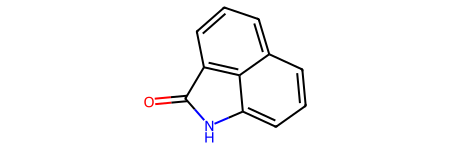

In [6]:
# inspecting a molecule in our dataset
row = df.iloc[1]
ipy_display.display(row)
smile = str(row['SMILES'])
mol = Chem.MolFromSmiles(smile)
display(mol)

In [6]:
# new column in our data set holding all the mol objects
df['mol'] = df['SMILES'].apply(Chem.MolFromSmiles)
df[['mol']].head()

[23:15:31] WARNING: not removing hydrogen atom without neighbors
[23:15:31] WARNING: not removing hydrogen atom without neighbors
[23:15:31] WARNING: not removing hydrogen atom without neighbors
[23:15:31] WARNING: not removing hydrogen atom without neighbors
[23:15:31] WARNING: not removing hydrogen atom without neighbors
[23:15:31] WARNING: not removing hydrogen atom without neighbors
[23:15:31] WARNING: not removing hydrogen atom without neighbors
[23:15:31] WARNING: not removing hydrogen atom without neighbors
[23:15:31] WARNING: not removing hydrogen atom without neighbors
[23:15:31] WARNING: not removing hydrogen atom without neighbors
[23:15:31] WARNING: not removing hydrogen atom without neighbors
[23:15:31] WARNING: not removing hydrogen atom without neighbors
[23:15:31] WARNING: not removing hydrogen atom without neighbors
[23:15:31] WARNING: not removing hydrogen atom without neighbors
[23:15:31] WARNING: not removing hydrogen atom without neighbors
[23:15:31] WARNING: not r

,mol
0,<rdkit.Chem.rdchem.Mol object at 0x7e8dc6f12ff0>
1,<rdkit.Chem.rdchem.Mol object at 0x7e8dc6f13760>
2,<rdkit.Chem.rdchem.Mol object at 0x7e8dc8741620>
3,<rdkit.Chem.rdchem.Mol object at 0x7e8dc8741770>
4,<rdkit.Chem.rdchem.Mol object at 0x7e8dc87414d0>


(9982, 1)


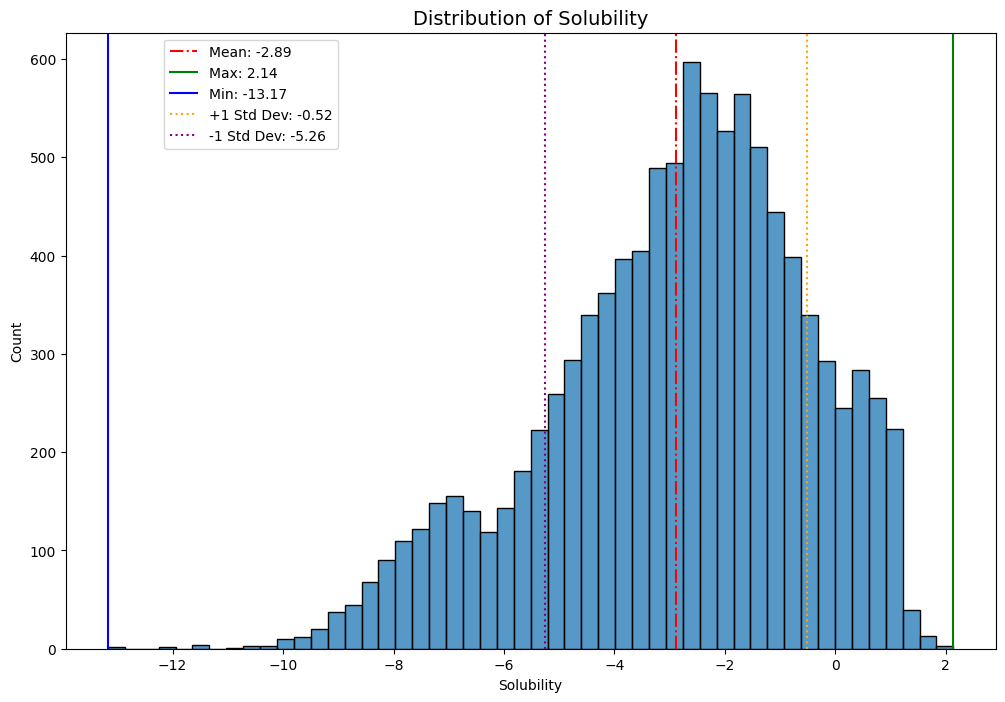

Text(0.5, 1.0, 'Box Plot of Solubility')

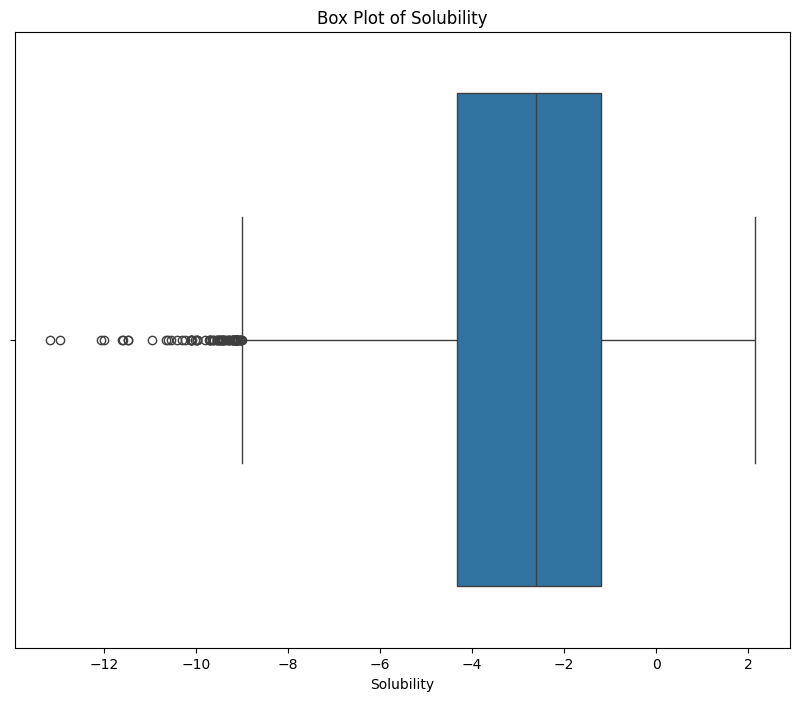

In [12]:
# Displaying distribution of Solubility values

y = df['Solubility'].values.reshape(-1,1)
stats = df['Solubility'].agg(["max", "min", "std", "mean"])

print(y.shape)

plt.figure(figsize=(12, 8))
g = sns.histplot(df['Solubility'],bins=50)
plt.xlabel('Solubility')
plt.title('Distribution of Solubility', fontsize=14)

# Vertical line for basic statistics statistics
plt.axvline(stats['mean'], color='red', linestyle='-.', label=f"Mean: {stats['mean']:.2f}")
plt.axvline(stats['max'], color='green', linestyle='-', label=f"Max: {stats['max']:.2f}")
plt.axvline(stats['min'], color='blue', linestyle='-', label=f"Min: {stats['min']:.2f}")
plt.axvline(stats['mean'] + stats['std'], color='orange', linestyle=':', label=f"+1 Std Dev: {stats['mean'] + stats['std']:.2f}")
plt.axvline(stats['mean'] - stats['std'], color='purple', linestyle=':', label=f"-1 Std Dev: {stats['mean'] - stats['std']:.2f}")

plt.legend(loc="upper right", bbox_to_anchor=(0.30, 1))


plt.show()

# Box plot for Solubility
plt.figure(figsize=(10, 8))
sns.boxplot(x=df['Solubility'])
plt.title("Box Plot of Solubility")

The data is quite right skewed, some type of normalization may be required. Also seems like some outliers exist outside the -9 range.

In [ ]:
lower_threshold = -9
upper_threshold = 1

count_outside_threshold = ((df['Solubility'] <= lower_threshold) | (df['Solubility'] > upper_threshold)).sum()
percentage_outside = count_outside_threshold / len(df) * 100

print(f"Percentage of entries outside [{lower_threshold}, {upper_threshold}]: {percentage_outside:.2f}%, count: {count_outside_threshold}")

df_filtered = df[(df['Solubility'] > lower_threshold) & (df['Solubility'] < upper_threshold)].copy()

df_filtered = df_filtered.reset_index(drop=True)
df_filtered.shape

Percentage of entries outside [-9, 1]: 2.69%, count: 269


(9712, 28)

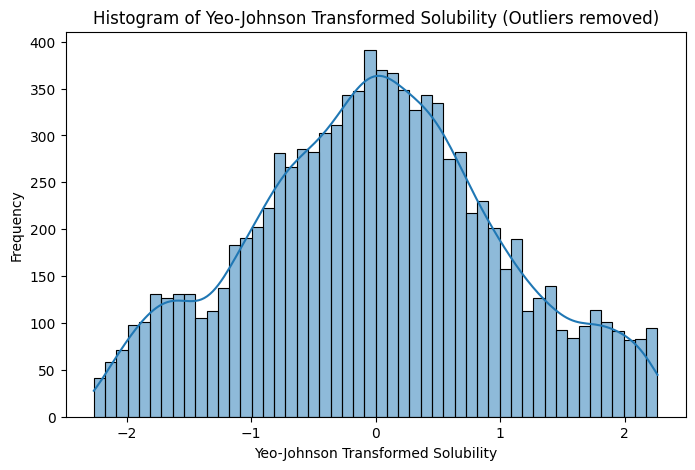

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
df_filtered['YeoJohnson_Solubility'] = pt.fit_transform(df_filtered[['Solubility']])

# Plot histogram of transformed solubility
plt.figure(figsize=(8, 5))
sns.histplot(df_filtered['YeoJohnson_Solubility'], bins=50, kde=True)
plt.xlabel('Yeo-Johnson Transformed Solubility')
plt.ylabel('Frequency')
plt.title('Histogram of Yeo-Johnson Transformed Solubility (Outliers removed)')
plt.show()

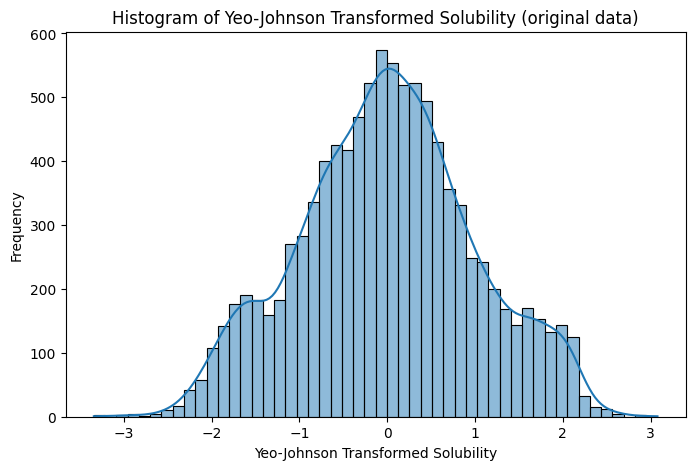

In [ ]:
# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
df['YeoJohnson_Solubility'] = pt.fit_transform(df[['Solubility']])

# Plot histogram of transformed solubility
plt.figure(figsize=(8, 5))
sns.histplot(df['YeoJohnson_Solubility'], bins=50, kde=True)
plt.xlabel('Yeo-Johnson Transformed Solubility')
plt.ylabel('Frequency')
plt.title('Histogram of Yeo-Johnson Transformed Solubility (original data)')
plt.show()

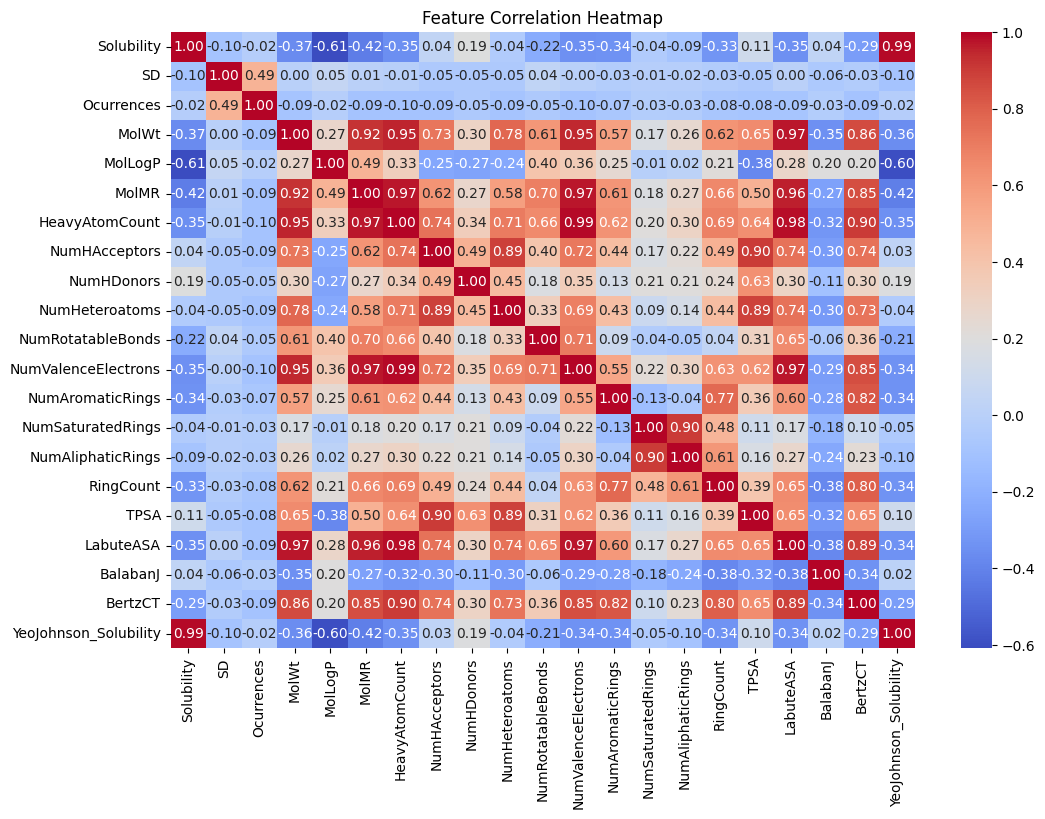

In [ ]:
# Correlation heat map to identify redundant columns
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Based on a glance, it looks like LabuteASA, NumValenceElectrons and HeavyAtomCount are quite redundant attributes (high correlation with other attributes). Might need to consider this when making a choice on feature selection for our baseline (and final NN).

[23:39:58] WARNING: not removing hydrogen atom without neighbors
[23:39:58] WARNING: not removing hydrogen atom without neighbors
[23:39:58] WARNING: not removing hydrogen atom without neighbors
[23:39:58] WARNING: not removing hydrogen atom without neighbors
[23:39:58] WARNING: not removing hydrogen atom without neighbors
[23:39:58] WARNING: not removing hydrogen atom without neighbors
[23:39:58] WARNING: not removing hydrogen atom without neighbors
[23:39:58] WARNING: not removing hydrogen atom without neighbors
[23:39:58] WARNING: not removing hydrogen atom without neighbors
[23:39:58] WARNING: not removing hydrogen atom without neighbors
[23:39:58] WARNING: not removing hydrogen atom without neighbors
[23:39:58] WARNING: not removing hydrogen atom without neighbors
[23:39:59] WARNING: not removing hydrogen atom without neighbors
[23:39:59] WARNING: not removing hydrogen atom without neighbors
[23:39:59] WARNING: not removing hydrogen atom without neighbors
[23:39:59] WARNING: not r

Invalid SMILES: 0

Top 10 Most Frequent Scaffolds:
1. Scaffold: No Scaffold | Count: 2940
2. Scaffold: c1ccccc1 | Count: 1753
3. Scaffold: c1ccc(-c2ccccc2)cc1 | Count: 219
4. Scaffold: c1ccc2ccccc2c1 | Count: 152
5. Scaffold: c1ccc(Oc2ccccc2)cc1 | Count: 139
6. Scaffold: C1CCCCC1 | Count: 117
7. Scaffold: c1ccncc1 | Count: 102
8. Scaffold: c1ccc(Cc2ccccc2)cc1 | Count: 73
9. Scaffold: c1ccc(N=Nc2ccccc2)cc1 | Count: 61
10. Scaffold: O=c1cc[nH]c(=O)[nH]1 | Count: 52


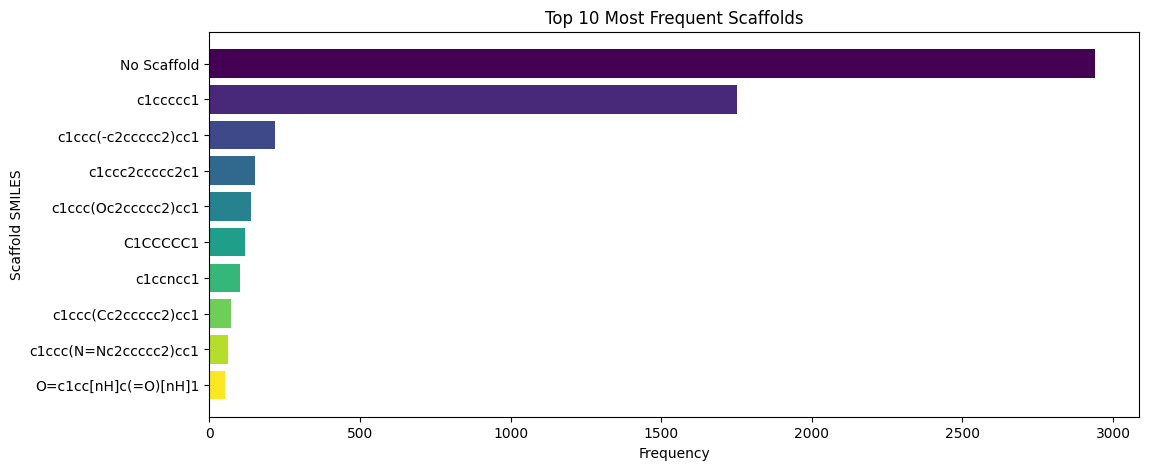

In [23]:
from rdkit.Chem.Scaffolds import MurckoScaffold
from collections import Counter

# exploring the scaffolds in our data set (will be useful for scaffold splits)

# want to standardized smiles from rdkit library
def standardize_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return Chem.MolToSmiles(mol) if mol else None

df["RDKit_SMILES"] = df["SMILES"].apply(standardize_smiles)

# extract murcko scaffold
def get_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        scaffold = MurckoScaffold.GetScaffoldForMol(mol)
        scaffold_smiles = Chem.MolToSmiles(scaffold)
        return scaffold_smiles if scaffold_smiles else "No Scaffold"
    return "INVALID"

df["Scaffold"] = df["RDKit_SMILES"].apply(get_scaffold)

# check how many invalid scaffolds were found
num_invalid = (df["Scaffold"] == "INVALID").sum()
print(f"Invalid SMILES: {num_invalid}")

# count scaffold occurrences
scaffold_counts = Counter(df["Scaffold"].dropna())
sorted_scaffolds = scaffold_counts.most_common(10)

# visualize top 10 most common scaffolds
scaffold_df = pd.DataFrame(sorted_scaffolds, columns=["Scaffold", "Count"])

print("\nTop 10 Most Frequent Scaffolds:")
for i, (scaffold, count) in enumerate(sorted_scaffolds):
    print(f"{i+1}. Scaffold: {scaffold} | Count: {count}")

scaffold_df = pd.DataFrame(sorted_scaffolds, columns=["Scaffold", "Count"])

colors = plt.cm.viridis(np.linspace(0, 1, len(scaffold_df)))
plt.figure(figsize=(12, 5))
plt.barh(scaffold_df["Scaffold"], scaffold_df["Count"], color=colors)
plt.xlabel("Frequency")
plt.ylabel("Scaffold SMILES")
plt.title("Top 10 Most Frequent Scaffolds")
plt.gca().invert_yaxis()
plt.show()

huge scaffold imbalance, will need to implements ome type of scaffold splits